<a href="https://colab.research.google.com/github/kavita04091988/Assignments/blob/main/Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Read the combined dataset
file_path = '/content/preprocessed_data698.xlsx'
combined_df = pd.read_excel(file_path)

# Step 2: Handle missing values (if any)
combined_df.fillna(0, inplace=True)

# Step 3: Split the dataset into training and testing sets

train_df = combined_df[combined_df['Year'].isin(range(2015, 2021))]
test_df = combined_df[combined_df['Year'].isin(range(2021, 2023))]

# Step 4: Separate features and target variable
X_train = train_df.drop(columns=['overall', 'potential', 'Year'])
y_train = train_df['potential'] - train_df['overall']

X_test = test_df.drop(columns=['overall', 'potential', 'Year'])
y_test = test_df['potential'] - test_df['overall']



# Step 8: Optionally, save the split datasets to separate files
train_df.to_excel('train_data.xlsx', index=False)
test_df.to_excel('test_data.xlsx', index=False)


In [ ]:
import pandas as pd
import numpy as np

# Read data from Excel sheet
df = pd.read_excel('/content/preprocessed_dataVeryNew.xlsx')  # Replace 'your_file.xlsx' with the actual file path
# Remove '+' symbol and any value after it in the 'gk' column
df['gk'] = df['gk'].str.split('+').str[0]


# Save the updated DataFrame to a new Excel sheet
df.to_excel('/content/preprocessed_dataVeryVeryNew.xlsx', index=False)  # Replace 'updated_data.xlsx' with the desired file path

In [ ]:
import pandas as pd

# Read the data from Excel file
df = pd.read_excel('/content/preprocessed_data69.xlsx')
# List of 'position' columns
position_columns = ['position_1', 'position_2', 'position_3', 'position_4']

# Replace values less than or equal to 0 with NaN in 'position' columns
for col in position_columns:
    df.loc[df[col] <= 0, col] = pd.NA


for col in position_columns:
    print(f"Unique values in {col} after replacement:", df[col].unique())

Epoch 1/30
3247/3247 [==============================] - 12s 4ms/step - loss: 5.4621 - mean_absolute_error: 1.5168 - val_loss: 3.4977 - val_mean_absolute_error: 1.2006 - lr: 0.0010
Epoch 2/30
3247/3247 [==============================] - 12s 4ms/step - loss: 4.0587 - mean_absolute_error: 1.3141 - val_loss: 3.5408 - val_mean_absolute_error: 1.2121 - lr: 0.0010
Epoch 3/30
3247/3247 [==============================] - 10s 3ms/step - loss: 3.8649 - mean_absolute_error: 1.2831 - val_loss: 3.4180 - val_mean_absolute_error: 1.1633 - lr: 0.0010
Epoch 4/30
3247/3247 [==============================] - 12s 4ms/step - loss: 3.7699 - mean_absolute_error: 1.2757 - val_loss: 3.2823 - val_mean_absolute_error: 1.1455 - lr: 0.0010
Epoch 5/30
3247/3247 [==============================] - 12s 4ms/step - loss: 3.7018 - mean_absolute_error: 1.2721 - val_loss: 3.2692 - val_mean_absolute_error: 1.1376 - lr: 0.0010
Epoch 6/30
3247/3247 [==============================] - 11s 3ms/step - loss: 3.6128 - mean_absolute_

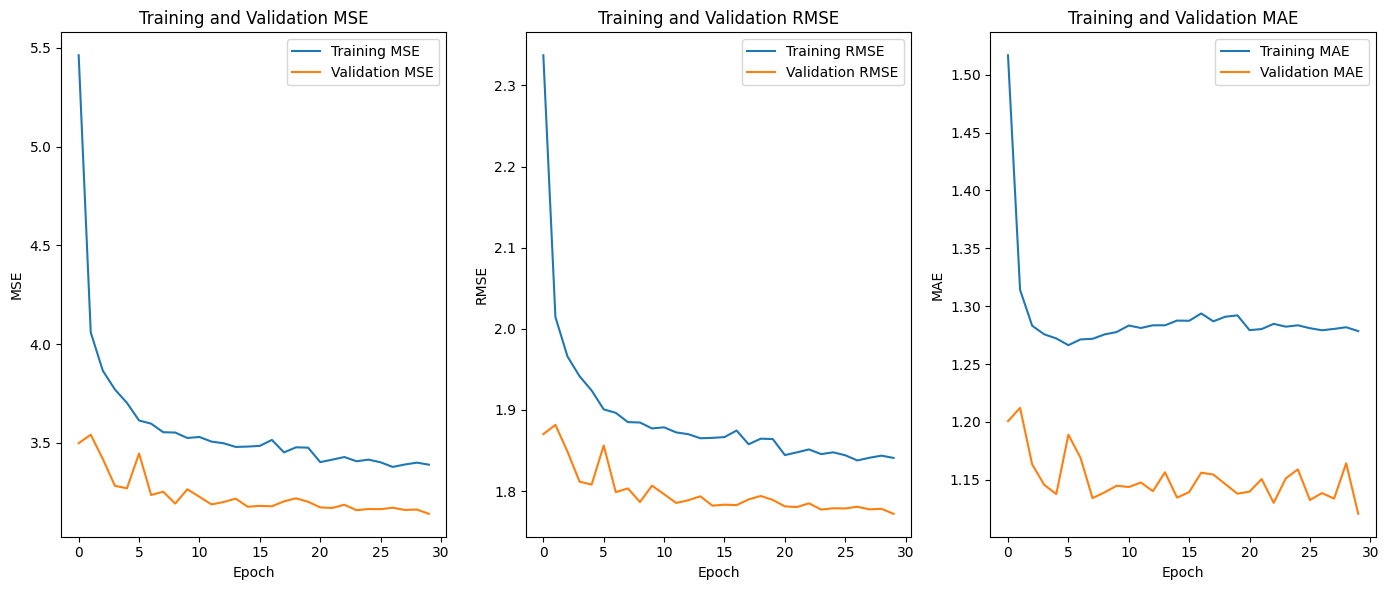

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Step 1: Read the training and test datasets from separate Excel sheets
train_file_path = 'train_data.xlsx'
test_file_path = 'test_data.xlsx'

train_df = pd.read_excel(train_file_path)
test_df = pd.read_excel(test_file_path)

# Step 2: Separate features and target variable for training and test datasets
X_train = train_df.drop(columns=['overall', 'potential', 'Year'])
y_train = (train_df['potential'].astype(float) - train_df['overall'].astype(float)).values

X_test = test_df.drop(columns=['overall', 'potential', 'Year'])
y_test = (test_df['potential'].astype(float) - test_df['overall'].astype(float)).values

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer with linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32,
                    validation_data=(X_test_scaled, y_test), verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test dataset
y_pred = model.predict(X_test_scaled).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)



# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error (MAE):", mae)


# Plot MSE, RMSE, and MAE
plt.figure(figsize=(14, 6))

# MSE
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# RMSE
plt.subplot(1, 3, 2)
plt.plot(np.sqrt(history.history['loss']), label='Training RMSE')
plt.plot(np.sqrt(history.history['val_loss']), label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

# MAE
plt.subplot(1, 3, 3)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()





In [ ]:
!pip install pycaret
!pip install mlflow
import pandas as pd
import numpy as np
from pycaret.regression import *

# Read the data from Excel file
data = pd.read_excel('/content/preprocessed_data698.xlsx')

# Display the first few rows to check for any issues
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Initialize PyCaret setup with logging enabled
reg_setup = setup(data, target='potential', train_size=0.8, session_id=123, log_experiment=True, experiment_name='regression_experiment')

# Compare different regression models
best_model = compare_models()

# Create a model
lr_model = create_model('lr')

# Tune model hyperparameters
tuned_lr_model = tune_model(lr_model)

# Evaluate model
evaluate_model(tuned_lr_model)

# Finalize model for deployment
final_lr_model = finalize_model(tuned_lr_model)

# Save the final model
save_model(final_lr_model, 'final_regression_model')



   short_name_encoded  overall  potential  age  height_cm  weight_kg  \
0                   0       93         95   27        169         67   
1                   1       92         92   29        185         80   
2                   2       90         90   30        180         80   
3                   3       90         90   32        195         95   
4                   4       90         90   28        193         92   

   preferred_foot  weak_foot  skill_moves  pace  ...  passing  dribbling  \
0               0          3            4    93  ...       86         96   
1               1          4            5    93  ...       81         91   
2               0          2            4    93  ...       83         92   
3               1          4            4    76  ...       81         86   
4               1          4            1     0  ...        0          0   

   defending  physic    gk  Year  position_1  position_2  position_3  \
0         27      63  15.0  2015      

,Description,Value
0,Session id,123
1,Target,potential
2,Target type,Regression
3,Original data shape,"(142079, 21)"
4,Transformed data shape,"(142079, 21)"
5,Transformed train set shape,"(113663, 21)"
6,Transformed test set shape,"(28416, 21)"
7,Numeric features,20
8,Rows with missing values,98.9%
9,Preprocess,True


2024/05/27 12:20:09 INFO mlflow.tracking.fluent: Experiment with name 'regression_experiment' does not exist. Creating a new experiment.


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.0670,2.7358,1.6539,0.9305,0.0232,0.0151,4.5170
xgboost,Extreme Gradient Boosting,1.0742,2.7564,1.6601,0.9300,0.0233,0.0152,1.5520
rf,Random Forest Regressor,1.0831,2.9275,1.7109,0.9257,0.0240,0.0153,101.7210
gbr,Gradient Boosting Regressor,1.1184,2.9334,1.7126,0.9255,0.0240,0.0159,25.9210
et,Extra Trees Regressor,1.1017,3.0520,1.7468,0.9225,0.0245,0.0156,67.5860
dt,Decision Tree Regressor,1.4549,5.6756,2.3822,0.8559,0.0334,0.0206,1.6110
lr,Linear Regression,1.9303,6.2674,2.5034,0.8409,0.0356,0.0276,1.1180
ridge,Ridge Regression,1.9303,6.2674,2.5034,0.8409,0.0356,0.0276,0.1860
br,Bayesian Ridge,1.9303,6.2674,2.5034,0.8409,0.0356,0.0276,0.2800
en,Elastic Net,1.9702,6.5128,2.5520,0.8346,0.0362,0.0282,0.5230


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9367,6.3120,2.5124,0.8403,0.0356,0.0277
1,1.9607,6.4356,2.5368,0.8350,0.0360,0.0281
2,1.9176,6.1808,2.4861,0.8440,0.0353,0.0275
3,1.9299,6.3081,2.5116,0.8408,0.0356,0.0276
4,1.9330,6.2803,2.5060,0.8398,0.0355,0.0276
5,1.9316,6.2522,2.5004,0.8418,0.0355,0.0277
6,1.9301,6.2604,2.5021,0.8412,0.0355,0.0277
7,1.9116,6.1026,2.4703,0.8488,0.0352,0.0274
8,1.9270,6.2844,2.5069,0.8370,0.0355,0.0276


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9367,6.3120,2.5124,0.8403,0.0356,0.0277
1,1.9607,6.4356,2.5368,0.8350,0.0360,0.0281
2,1.9176,6.1808,2.4861,0.8440,0.0353,0.0275
3,1.9299,6.3081,2.5116,0.8408,0.0356,0.0276
4,1.9330,6.2803,2.5060,0.8398,0.0355,0.0276
5,1.9316,6.2522,2.5004,0.8418,0.0355,0.0277
6,1.9301,6.2604,2.5021,0.8412,0.0355,0.0277
7,1.9116,6.1026,2.4703,0.8488,0.0352,0.0274
8,1.9270,6.2844,2.5069,0.8370,0.0355,0.0276


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['short_name_encoded', 'overall',
                                              'age', 'height_cm', 'weight_kg',
                                              'preferred_foot', 'weak_foot',
                                              'skill_moves', 'pace', 'shooting',
                                              'passing', 'dribbling',
                                              'defending', 'physic', 'gk',
                                              'Year', 'position_1', 'position_2',
                                              'position_3', 'position_4'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator', LinearRegressio

In [ ]:
!pip install pycaret
!pip install mlflow
import pandas as pd
import numpy as np
from pycaret.regression import *

# Read the data from Excel file
data = pd.read_excel('/content/preprocessed_data698.xlsx')

In [ ]:
print(data.head())

   short_name_encoded  overall  potential  age  height_cm  weight_kg  \
0                   0       93         95   27        169         67   
1                   1       92         92   29        185         80   
2                   2       90         90   30        180         80   
3                   3       90         90   32        195         95   
4                   4       90         90   28        193         92   

   preferred_foot  weak_foot  skill_moves  pace  ...  passing  dribbling  \
0               0          3            4    93  ...       86         96   
1               1          4            5    93  ...       81         91   
2               0          2            4    93  ...       83         92   
3               1          4            4    76  ...       81         86   
4               1          4            1     0  ...        0          0   

   defending  physic    gk  Year  position_1  position_2  position_3  \
0         27      63  15.0  2015      

# New Section

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Initialize PyCaret setup with logging enabled
reg_setup = setup(data, target='potential', train_size=0.8, session_id=123, log_experiment=True, experiment_name='regression_experiment')

# Compare different regression models
best_model = compare_models()

# Create a model
lr_model = create_model('lr')

# Tune model hyperparameters
tuned_lr_model = tune_model(lr_model)

# Evaluate model
evaluate_model(tuned_lr_model)

# Finalize model for deployment
final_lr_model = finalize_model(tuned_lr_model)

# Save the final model
save_model(final_lr_model, 'final_regression_model')

In [ ]:
# Check for missing values
print(data.isnull().sum())

short_name_encoded         0
overall                    0
potential                  0
age                        0
height_cm                  0
weight_kg                  0
preferred_foot             0
weak_foot                  0
skill_moves                0
pace                       0
shooting                   0
passing                    0
dribbling                  0
defending                  0
physic                     0
gk                     15394
Year                       0
position_1                 0
position_2             75630
position_3            122997
position_4            140282
dtype: int64


In [ ]:
reg_setup = setup(data, target='potential', train_size=0.8, session_id=123, log_experiment=True, experiment_name='regression_experiment')

,Description,Value
0,Session id,123
1,Target,potential
2,Target type,Regression
3,Original data shape,"(142079, 21)"
4,Transformed data shape,"(142079, 21)"
5,Transformed train set shape,"(113663, 21)"
6,Transformed test set shape,"(28416, 21)"
7,Numeric features,20
8,Rows with missing values,98.9%
9,Preprocess,True


2024/06/04 06:59:47 INFO mlflow.tracking.fluent: Experiment with name 'regression_experiment' does not exist. Creating a new experiment.


In [ ]:
data.shape

(142079, 21)

In [ ]:
dataset = data.sample(frac=0.9, random_state=786)
data_unseen = data.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (142079, 21)
Unseen Data For Predictions: (0, 21)


In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.0670,2.7358,1.6539,0.9305,0.0232,0.0151,4.5400
xgboost,Extreme Gradient Boosting,1.0742,2.7564,1.6601,0.9300,0.0233,0.0152,1.7520
rf,Random Forest Regressor,1.0831,2.9275,1.7109,0.9257,0.0240,0.0153,90.3330
gbr,Gradient Boosting Regressor,1.1184,2.9334,1.7126,0.9255,0.0240,0.0159,23.1550
et,Extra Trees Regressor,1.1017,3.0520,1.7468,0.9225,0.0245,0.0156,57.2030
dt,Decision Tree Regressor,1.4549,5.6756,2.3822,0.8559,0.0334,0.0206,1.4750
lr,Linear Regression,1.9303,6.2674,2.5034,0.8409,0.0356,0.0276,0.9450
ridge,Ridge Regression,1.9303,6.2674,2.5034,0.8409,0.0356,0.0276,0.1330
br,Bayesian Ridge,1.9303,6.2674,2.5034,0.8409,0.0356,0.0276,0.2670
en,Elastic Net,1.9702,6.5128,2.5520,0.8346,0.0362,0.0282,0.3320


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6463,9.9339,3.1518,0.7487,0.0444,0.0381
1,2.6590,10.0943,3.1771,0.7412,0.0450,0.0385
2,2.5361,9.2788,3.0461,0.7658,0.0433,0.0367
3,2.6150,9.7084,3.1158,0.7550,0.0440,0.0377
4,2.6096,9.6553,3.1073,0.7537,0.0439,0.0377
5,2.6170,9.7693,3.1256,0.7529,0.0443,0.0379
6,2.6623,10.0262,3.1664,0.7457,0.0448,0.0385
7,2.4896,9.0923,3.0153,0.7747,0.0430,0.0362
8,2.6370,9.8239,3.1343,0.7452,0.0442,0.0380


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0875,2.8901,1.7000,0.9269,0.0239,0.0154
1,1.0664,2.7843,1.6686,0.9286,0.0234,0.0151
2,1.0692,2.7250,1.6507,0.9312,0.0232,0.0152
3,1.0634,2.7186,1.6488,0.9314,0.0232,0.0151
4,1.0730,2.7646,1.6627,0.9295,0.0234,0.0152
5,1.0639,2.6697,1.6339,0.9325,0.0229,0.0151
6,1.0598,2.6900,1.6401,0.9318,0.0230,0.0150
7,1.0521,2.6495,1.6277,0.9343,0.0229,0.0149
8,1.0724,2.7370,1.6544,0.9290,0.0232,0.0152


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4866,5.8999,2.4290,0.8508,0.0340,0.0210
1,1.4596,5.7346,2.3947,0.8530,0.0336,0.0206
2,1.4568,5.5991,2.3662,0.8587,0.0332,0.0206
3,1.4349,5.5929,2.3649,0.8589,0.0331,0.0203
4,1.4516,5.6026,2.3670,0.8571,0.0333,0.0205
5,1.4398,5.5070,2.3467,0.8607,0.0329,0.0204
6,1.4512,5.7176,2.3911,0.8550,0.0335,0.0206
7,1.4390,5.5149,2.3484,0.8633,0.0330,0.0204
8,1.4822,5.9769,2.4448,0.8450,0.0343,0.0210


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

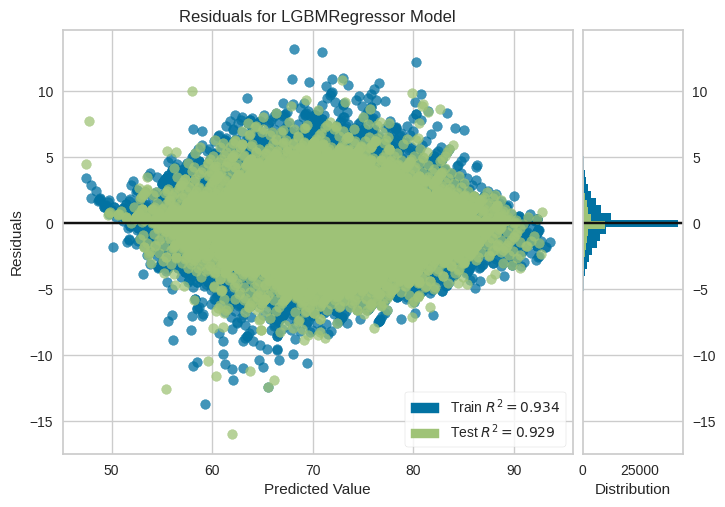

In [ ]:
plot_model(lightgbm)

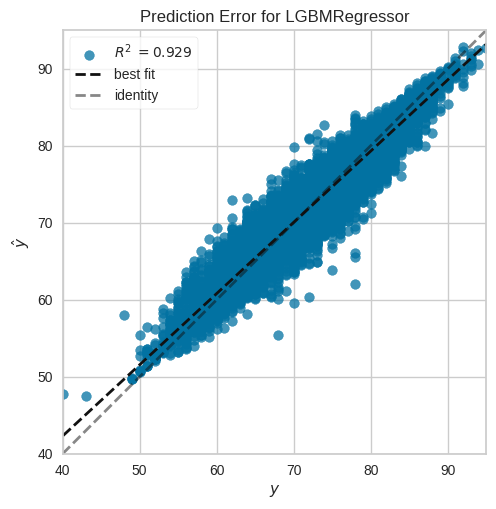

In [ ]:
plot_model(lightgbm, plot = 'error')

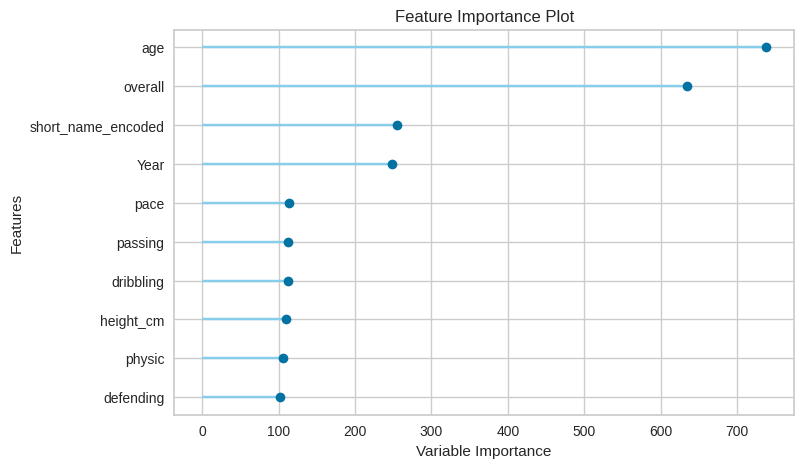

In [ ]:
plot_model(lightgbm, plot='feature')

In [29]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
predict_model(lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.0764,2.7577,1.6606,0.9294,0.0233,0.0153
